In [1]:
import sys
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras import backend
import os
import torch
import torch.utils.data
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from math import sin, cos
from PIL import ImageDraw, Image
import cv2
sys.path.append(os.path.abspath("./Residual-Attention-Network/"))
import seaborn as sns
import cv2
import time
import sklearn.preprocessing
from tqdm.notebook import tqdm
import torch.nn as nn

Using TensorFlow backend.


In [2]:
from collections import namedtuple
Label = namedtuple('Label', [

    'name'        , # The name of a car type
    'id'          , # id for specific car type
    'category'    , # The name of the car category, 'SUV', 'Sedan' etc
    'categoryId'  , # The ID of car category. Used to create ground truth images
                    # on category level.
    ])

models = [
    #     name          id   is_valid  category  categoryId
    Label(             'baojun-310-2017',          0,       '2x',          0),
    Label(                'biaozhi-3008',          1,       '2x',          0),
    Label(          'biaozhi-liangxiang',          2,       '2x',          0),
    Label(           'bieke-yinglang-XT',          3,       '2x',          0),
    Label(                'biyadi-2x-F0',          4,       '2x',          0),
    Label(               'changanbenben',          5,       '2x',          0),
    Label(                'dongfeng-DS5',          6,       '2x',          0),
    Label(                     'feiyate',          7,       '2x',          0),
    Label(         'fengtian-liangxiang',          8,       '2x',          0),
    Label(                'fengtian-MPV',          9,       '2x',          0),
    Label(           'jilixiongmao-2015',         10,       '2x',          0),
    Label(           'lingmu-aotuo-2009',         11,       '2x',          0),
    Label(                'lingmu-swift',         12,       '2x',          0),
    Label(             'lingmu-SX4-2012',         13,       '2x',          0),
    Label(              'sikeda-jingrui',         14,       '2x',          0),
    Label(        'fengtian-weichi-2006',         15,       '3x',          1),
    Label(                   '037-CAR02',         16,       '3x',          1),
    Label(                     'aodi-a6',         17,       '3x',          1),
    Label(                   'baoma-330',         18,       '3x',          1),
    Label(                   'baoma-530',         19,       '3x',          1),
    Label(            'baoshijie-paoche',         20,       '3x',          1),
    Label(             'bentian-fengfan',         21,       '3x',          1),
    Label(                 'biaozhi-408',         22,       '3x',          1),
    Label(                 'biaozhi-508',         23,       '3x',          1),
    Label(                'bieke-kaiyue',         24,       '3x',          1),
    Label(                        'fute',         25,       '3x',          1),
    Label(                     'haima-3',         26,       '3x',          1),
    Label(               'kaidilake-CTS',         27,       '3x',          1),
    Label(                   'leikesasi',         28,       '3x',          1),
    Label(               'mazida-6-2015',         29,       '3x',          1),
    Label(                  'MG-GT-2015',         30,       '3x',          1),
    Label(                       'oubao',         31,       '3x',          1),
    Label(                        'qiya',         32,       '3x',          1),
    Label(                 'rongwei-750',         33,       '3x',          1),
    Label(                  'supai-2016',         34,       '3x',          1),
    Label(             'xiandai-suonata',         35,       '3x',          1),
    Label(            'yiqi-benteng-b50',         36,       '3x',          1),
    Label(                       'bieke',         37,       '3x',          1),
    Label(                   'biyadi-F3',         38,       '3x',          1),
    Label(                  'biyadi-qin',         39,       '3x',          1),
    Label(                     'dazhong',         40,       '3x',          1),
    Label(              'dazhongmaiteng',         41,       '3x',          1),
    Label(                    'dihao-EV',         42,       '3x',          1),
    Label(      'dongfeng-xuetielong-C6',         43,       '3x',          1),
    Label(     'dongnan-V3-lingyue-2011',         44,       '3x',          1),
    Label(    'dongfeng-yulong-naruijie',         45,      'SUV',          2),
    Label(                     '019-SUV',         46,      'SUV',          2),
    Label(                   '036-CAR01',         47,      'SUV',          2),
    Label(                 'aodi-Q7-SUV',         48,      'SUV',          2),
    Label(                  'baojun-510',         49,      'SUV',          2),
    Label(                    'baoma-X5',         50,      'SUV',          2),
    Label(             'baoshijie-kayan',         51,      'SUV',          2),
    Label(             'beiqi-huansu-H3',         52,      'SUV',          2),
    Label(              'benchi-GLK-300',         53,      'SUV',          2),
    Label(                'benchi-ML500',         54,      'SUV',          2),
    Label(         'fengtian-puladuo-06',         55,      'SUV',          2),
    Label(            'fengtian-SUV-gai',         56,      'SUV',          2),
    Label(    'guangqi-chuanqi-GS4-2015',         57,      'SUV',          2),
    Label(        'jianghuai-ruifeng-S3',         58,      'SUV',          2),
    Label(                  'jili-boyue',         59,      'SUV',          2),
    Label(                      'jipu-3',         60,      'SUV',          2),
    Label(                  'linken-SUV',         61,      'SUV',          2),
    Label(                   'lufeng-X8',         62,      'SUV',          2),
    Label(                 'qirui-ruihu',         63,      'SUV',          2),
    Label(                 'rongwei-RX5',         64,      'SUV',          2),
    Label(             'sanling-oulande',         65,      'SUV',          2),
    Label(                  'sikeda-SUV',         66,      'SUV',          2),
    Label(            'Skoda_Fabia-2011',         67,      'SUV',          2),
    Label(            'xiandai-i25-2016',         68,      'SUV',          2),
    Label(            'yingfeinidi-qx80',         69,      'SUV',          2),
    Label(             'yingfeinidi-SUV',         70,      'SUV',          2),
    Label(                  'benchi-SUR',         71,      'SUV',          2),
    Label(                 'biyadi-tang',         72,      'SUV',          2),
    Label(           'changan-CS35-2012',         73,      'SUV',          2),
    Label(                 'changan-cs5',         74,      'SUV',          2),
    Label(          'changcheng-H6-2016',         75,      'SUV',          2),
    Label(                 'dazhong-SUV',         76,      'SUV',          2),
    Label(     'dongfeng-fengguang-S560',         77,      'SUV',          2),
    Label(       'dongfeng-fengxing-SX6',         78,      'SUV',          2)

]
car_name2id = {label.name: label for label in models}
car_id2name = {label.id: label for label in models}
import json
from mpl_toolkits.mplot3d import Axes3D
import glob
car_model_file = []
for file in glob.glob("./car_models_json/*"):
    car_model_file.append(file)
car_dic = {}
for file in car_model_file:
    with open(file) as json_file:
        data = json.load(json_file)
        vertices = np.array(data['vertices'])
        triangles = np.array(data['faces']) - 1
        # plt.figure(figsize=(20,10))
        # ax = plt.axes(projection='3d')
        # ax.set_title('car_type: '+data['car_type'])
        # ax.set_xlim([-3, 3])
        # ax.set_ylim([-3, 3])
        # ax.set_zlim([0, 3])
        # ax.plot_trisurf(vertices[:,0], vertices[:,2], triangles, -vertices[:,1], shade=True, color='grey')
        width_pix = vertices[:,0]
        width_min = min(width_pix)
        width_max = max(width_pix)
        width = width_max - width_min
        height_pix = vertices[:,1]
        height_min = min(height_pix)
        height_max = max(height_pix)
        height = height_max - height_min
        length_pix = vertices[:,2]
        length_min = min(length_pix)
        length_max = max(length_pix)
        length = length_max - length_min
        name = file.split('/')
        name = name[2].split('.')
        name = name[0]
        car_dic[name] = [width/2, height/2, length/2]
id_dic = {}
for id in range(79):
    id_dic[id] = car_dic[car_id2name[id].name]
car_dic = id_dic

In [3]:
train = pd.read_csv('./train.csv')
# k is camera instrinsic matrix
k = np.array([[2304.5479, 0,  1686.2379],
           [0, 2305.8757, 1354.9849],
           [0, 0, 1]], dtype = np.float32)

In [4]:
# convert euler angle to rotation matrix
def euler_to_Rot(yaw, pitch, roll):
    Y = np.array([[cos(yaw), 0, sin(yaw)],
                  [0, 1, 0],
                  [-sin(yaw), 0, cos(yaw)]])
    P = np.array([[1, 0, 0],
                  [0, cos(pitch), -sin(pitch)],
                  [0, sin(pitch), cos(pitch)]])
    R = np.array([[cos(roll), -sin(roll), 0],
                  [sin(roll), cos(roll), 0],
                  [0, 0, 1]])
    return np.dot(Y, np.dot(P, R))
def rotate(x, angle):
    x = x + angle
    x = x - (x + np.pi) // (2 * np.pi) * 2 * np.pi
    return x

In [5]:
def draw_line(image, points):
    color = (255, 0, 0)
    cv2.line(image, tuple(points[1][:2]), tuple(points[2][:2]), color, 16)
    cv2.line(image, tuple(points[1][:2]), tuple(points[4][:2]), color, 16)

    cv2.line(image, tuple(points[1][:2]), tuple(points[5][:2]), color, 16)
    cv2.line(image, tuple(points[2][:2]), tuple(points[3][:2]), color, 16)
    cv2.line(image, tuple(points[2][:2]), tuple(points[6][:2]), color, 16)
    cv2.line(image, tuple(points[3][:2]), tuple(points[4][:2]), color, 16)
    cv2.line(image, tuple(points[3][:2]), tuple(points[7][:2]), color, 16)

    cv2.line(image, tuple(points[4][:2]), tuple(points[8][:2]), color, 16)
    cv2.line(image, tuple(points[5][:2]), tuple(points[8][:2]), color, 16)

    cv2.line(image, tuple(points[5][:2]), tuple(points[6][:2]), color, 16)
    cv2.line(image, tuple(points[6][:2]), tuple(points[7][:2]), color, 16)
    cv2.line(image, tuple(points[7][:2]), tuple(points[8][:2]), color, 16)
    return image


def draw_points(image, points):
    image = np.array(image)
    for (p_x, p_y) in points:
        # print("p_x, p_y", p_x, p_y)
        cv2.circle(image, (p_x, p_y), 5, (255, 0, 0), -1)
    return image

In [6]:
# image coordinate to world coordinate
def img_cor_2_world_cor():
    x_img, y_img, z_img = img_cor_points[0]
    xc, yc, zc = x_img*z_img, y_img*z_img, z_img
    p_cam = np.array([xc, yc, zc])
    xw, yw, zw = np.dot(np.linalg.inv(k), p_cam)
    print(xw, yw, zw)
    print(x, y, z)

In [7]:
# #preprocess by cropping
# X_SIZE = 3384
# Y_SIZE = 2710
# PADDING_X, PADDING_Y = 1100, 1000
# X_SIZE+=2*PADDING_X
# Y_SIZE+=2*PADDING_Y
# PADDING_RATIO_X, PADDING_RATIO_Y = PADDING_X/X_SIZE, PADDING_Y/Y_SIZE
# train_csv = pd.read_csv('./train.csv')
# count = 0
# img_count = 0
# df = pd.DataFrame(columns = ['original_name', 'cropped_filename', 'ymin', 'ymax', 'xmin', 'xmax', 'yaw', 'pitch', 'roll', 'x', 'y', 'z'])
# for idx in range(len(train_csv)):
#     img_name = train_csv.loc[idx]['ImageId']
#     pred_string = train_csv.loc[idx]['PredictionString']
#     img = np.zeros((Y_SIZE, X_SIZE, 3))
#     img[PADDING_Y:-PADDING_Y, PADDING_X:-PADDING_X] = plt.imread('./train_images/' + img_name + '.jpg').astype(float)/255
#     #process prediction string
#     items = pred_string.split(' ')
#     model_types, yaws, pitches, rolls, xs, ys, zs = [items[i::7] for i in range(7)]
#     #iterate over each vehcicle
#     for model_type, yaw, pitch, roll, x, y, z in zip(model_types, yaws, pitches, rolls, xs, ys, zs):
#         x_l, y_l, z_l = car_dic[int(model_type)]
#         yaw, pitch, roll, x, y, z = [float(x) for x in [yaw, pitch, roll, x, y, z]]
#         img_x, img_y, img_z = np.dot(k, [x, y, z])
#         #target = np.array([yaw, np.sin(pitch), np.cos(pitch), rotate(roll, np.pi), img_x/10000, img_y/10000, img_z/10]) #result to regress to
#         target = np.array([yaw, np.sin(pitch), np.cos(pitch), rotate(roll, np.pi), x, y, z]) #result to regress to
#         # I think the pitch and yaw should be exchanged
#         yaw, pitch, roll = -pitch, -yaw, -roll
#         Rt = np.eye(4)
#         t = np.array([x, y, z])
#         Rt[:3, 3] = t
#         Rt[:3, :3] = euler_to_Rot(yaw, pitch, roll).T
#         Rt = Rt[:3, :]
#         P = np.array([[0, 0, 0, 1],
#                       [x_l, y_l, -z_l, 1],
#                       [x_l, y_l, z_l, 1],
#                       [-x_l, y_l, z_l, 1],
#                       [-x_l, y_l, -z_l, 1],
#                       [x_l, -y_l, -z_l, 1],
#                       [x_l, -y_l, z_l, 1],
#                       [-x_l, -y_l, z_l, 1],
#                       [-x_l, -y_l, -z_l, 1]]).T

#         # call this function before change the astype
#         img_cor_points = np.dot(k, np.dot(Rt, P)) # calculate 8 corners and center in terms of camera coordinate
#         img_cor_points = img_cor_points.T
#         img_cor_points[:, 0] /= img_cor_points[:, 2] # project onto 2d camera plane
#         img_cor_points[:, 1] /= img_cor_points[:, 2]
#         xmax = np.amax(img_cor_points[:,0]) # calculate 2d box
#         xmin = np.amin(img_cor_points[:,0])
#         ymax = np.amax(img_cor_points[:,1])
#         ymin = np.amin(img_cor_points[:,1])
#         if xmin+PADDING_X<0 or xmax+PADDING_X>X_SIZE or ymin+PADDING_Y<0 or ymax+PADDING_Y>Y_SIZE:
#             print(x, y, z, xmax, xmin, ymax, ymin)
#             continue
#         # Crop image
#         img_crop = cv2.resize(img[int(ymin)+PADDING_Y:int(ymax)+PADDING_Y, int(xmin)+PADDING_X:int(xmax)+PADDING_X], (224, 224))
#         img_crop = np.clip(img_crop, 0, 1)
#         #input_tensor = img_crop.transpose((2, 0, 1))
#         original_name = './train_images/' + img_name + '.jpg'
#         filename = './Joseph_Dataset/Images/'+"%05d"%count+'.jpg'
#         plt.imsave(filename, img_crop)
#         row = {'original_name': original_name, 'cropped_filename':filename, 'ymin':ymin, 'ymax':ymax, 'xmin':xmin, 'xmax':xmax, 
#                'yaw':yaw, 'pitch':pitch, 'roll':roll, 'x':x, 'y':y, 'z':z}
#         df = df.append(row, ignore_index = True)
#         count+=1
#         if count%1000 == 0:
#             print(count, img_count)
#             df.to_csv('./Joseph_Dataset/cropped_annotations')
#     img_count+=1

In [8]:
# Now begin the initialization of dictionary for image training set
df = pd.read_csv('./Joseph_Dataset/cropped_annotations')
display(df)

,Unnamed: 0,original_name,cropped_filename,ymin,ymax,xmin,xmax,yaw,pitch,roll,x,y,z
0,0,./train_images/ID_8a6e65317.jpg,./Joseph_Dataset/Images/00000.jpg,1863.331241,2236.058830,2800.296688,4069.028834,2.575340,-0.254839,3.10256,7.965390,3.20066,11.0225
1,1,./train_images/ID_8a6e65317.jpg,./Joseph_Dataset/Images/00001.jpg,1801.196377,2033.024638,2511.198068,3183.332931,1.469470,-0.181647,3.12159,9.603320,4.66632,19.3390
2,2,./train_images/ID_8a6e65317.jpg,./Joseph_Dataset/Images/00002.jpg,1751.173978,1825.995706,1985.578241,2191.953574,1.568650,-0.163072,3.11754,10.390000,11.22190,59.7825
3,3,./train_images/ID_8a6e65317.jpg,./Joseph_Dataset/Images/00003.jpg,1743.544803,1945.196534,576.675996,967.537618,3.139500,-0.141942,-3.11969,-9.592360,5.13662,24.7337
4,4,./train_images/ID_8a6e65317.jpg,./Joseph_Dataset/Images/00004.jpg,1743.687649,1806.683346,1913.203683,2081.185117,2.085780,-0.163068,3.11754,9.833350,13.26890,72.9323
5,5,./train_images/ID_337ddc495.jpg,./Joseph_Dataset/Images/00005.jpg,1770.449295,1911.666062,1360.288086,1560.204816,-0.192169,-0.163988,3.12112,-3.174240,6.55331,31.4339
6,6,./train_images/ID_337ddc495.jpg,./Joseph_Dataset/Images/00006.jpg,1740.509885,1832.726902,1005.824138,1122.697883,2.963070,-0.112482,-3.13951,-14.726900,10.20770,54.8175
7,7,./train_images/ID_337ddc495.jpg,./Joseph_Dataset/Images/00007.jpg,1760.741822,1832.031325,1297.912368,1439.634349,-0.357280,-0.186114,3.10043,-7.498180,10.31120,54.0320
8,8,./train_images/ID_337ddc495.jpg,./Joseph_Dataset/Images/00008.jpg,1718.737766,1809.049228,1267.927827,1358.814746,-0.218402,-0.020968,-3.12213,-10.353100,11.24530,63.7140
9,9,./train_images/ID_337ddc495.jpg,./Joseph_Dataset/Images/00009.jpg,1740.376510,1801.636036,920.649756,998.269435,2.847780,-0.195428,3.13394,-22.771100,13.07040,72.2694


In [22]:
class stage2Dataset(torch.utils.data.Dataset):
    def __init__(self, mode = 'train'):
        super(stage2Dataset, self)
        self.df = pd.read_csv('./Joseph_Dataset/cropped_annotations')
        self.means = {}
        self.stds = {}
        keys = ['x', 'y', 'z']
        for key in keys:
            self.means[key] = np.mean(df[key])
            self.stds[key] = np.std(df[key])
        if mode == 'train':
            self.df = self.df[:int(len(self.df)*0.1)]    ####### change this later
        else:
            self.df = self.df[int(len(self.df)*0.1):]    ####### change this later

    def __len__(self):
        return len(self.df)
    def __getitem__(self, idx):
        dic = dict(self.df.iloc[idx])
        keys = ['cropped_filename','xmin', 'xmax', 'ymin', 'ymax', 'yaw', 'pitch', 'roll', 'x', 'y', 'z']
        cropped_filename, xmin, xmax, ymin, ymax, yaw, pitch, roll, x, y, z = [dic[key] for key in keys]
        #img = plt.imread(cropped_filename)
        img = 1    ####### change this later
        keys = ['x', 'y', 'z']
        means = np.array([self.means[key] for key in keys])
        stds = np.array([self.stds[key] for key in keys])
        return img, np.array([xmax/3384,ymax/2710, xmin/3384, ymin/2710]).astype('float32'), ((np.array([x, y, z]))/stds).astype('float32')

stage2set = stage2Dataset()
trainloader = torch.utils.data.DataLoader(stage2set, batch_size=128, shuffle = True)

In [17]:
import torch
import torch.nn as nn
from torch.nn import init
import functools
from torch.autograd import Variable
import numpy as np
from model.basic_layers import ResidualBlock
from model.attention_module import AttentionModule_stage1, AttentionModule_stage2, AttentionModule_stage3, AttentionModule_stage0
from model.attention_module import AttentionModule_stage1_cifar, AttentionModule_stage2_cifar, AttentionModule_stage3_cifar
class ResidualAttentionModel_56(nn.Module):
    # for input size 224
    def __init__(self):
        super(ResidualAttentionModel_56, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(5, 64, kernel_size=7, stride=2, padding=3, bias = False),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True)
        )
        self.mpool1 = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.residual_block1 = ResidualBlock(64, 256)
        self.attention_module1 = AttentionModule_stage1(256, 256)
        self.residual_block2 = ResidualBlock(256, 512, 2)
        self.attention_module2 = AttentionModule_stage2(512, 512)
        self.residual_block3 = ResidualBlock(512, 1024, 2)
        self.attention_module3 = AttentionModule_stage3(1024, 1024)
        self.residual_block4 = ResidualBlock(1024, 2048, 2)
        self.residual_block5 = ResidualBlock(2048, 2048)
        self.residual_block6 = ResidualBlock(2048, 2048)
        self.mpool2 = nn.Sequential(
            nn.BatchNorm2d(2048),
            nn.ReLU(inplace=True),
            nn.AvgPool2d(kernel_size=7, stride=1)
        )
        self.fc = nn.Linear(2048,7)

    def forward(self, x):
        out = self.conv1(x)
        out = self.mpool1(out)
        # print(out.data)
        out = self.residual_block1(out)
        out = self.attention_module1(out)
        out = self.residual_block2(out)
        out = self.attention_module2(out)
        out = self.residual_block3(out)
        # print(out.data)
        out = self.attention_module3(out)
        out = self.residual_block4(out)
        out = self.residual_block5(out)
        out = self.residual_block6(out)
        out = self.mpool2(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)

        return out

In [18]:
def get_mesh(batch_size, shape_y, shape_x, box_specs):
    mesh = torch.zeros([batch_size, 2, shape_y, shape_x])
    for i in range(batch_size):
        xmax, ymax, xmin, ymin = box_specs[i].detach().numpy()
        mg_y, mg_x = np.meshgrid(np.linspace(ymin, ymax, shape_y), np.linspace(xmin, xmax, shape_x), indexing = 'ij')
        mesh[i, 0, :, :] = torch.Tensor(mg_y)
        mesh[i, 1, :, :] = torch.Tensor(mg_x)
    return mesh

def conv3x3(in_planes, out_planes, stride=1, groups=1, dilation=1):
    """3x3 convolution with padding"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=dilation, groups=groups, bias=False, dilation=dilation)


def conv1x1(in_planes, out_planes, stride=1):
    """1x1 convolution"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=stride, bias=False)


class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(BasicBlock, self).__init__()
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = nn.BatchNorm2d(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = nn.BatchNorm2d(planes)
        self.downsample = downsample
        self.stride = stride
    def forward(self, x):
        residual = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        if self.downsample is not None:
            residual = self.downsample(x)
        out += residual
        out = self.relu(out)
        return out
class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=3):
        self.inplanes = 66 #64
        super(ResNet, self).__init__()
        self.conv1 = nn.Conv2d(2, 64, kernel_size=7, stride=2, padding=3,
                               bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(block, 64, layers[0]) #64
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2) #128
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2) #256
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2) #512
        self.avgpool = nn.AvgPool2d(7, stride=1)
        #self.fc = nn.Linear(512 * block.expansion, num_classes)
        self.fc = nn.Linear(7*7*514 * block.expansion, 100)
        self.fc1 = nn.Linear(100, num_classes)
    def _make_layer(self, block, planes, blocks, stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.inplanes, planes * block.expansion,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes * block.expansion),
            )
        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes * block.expansion
        for i in range(1, blocks):
            layers.append(block(self.inplanes, planes))
        ## to compensate for the meshgrid for next round
        self.inplanes += 2
        return nn.Sequential(*layers)
    def forward(self, x, box_specs):
        batch_size = len(box_specs)
        mesh = get_mesh(batch_size, 224, 224, box_specs) ######     change later!
        x = mesh
        
        
        x = self.conv1(x)    # 224x224
        x = self.bn1(x)     
        x = self.relu(x)
        x = self.maxpool(x)  # 112x112
        
        mesh = get_mesh(batch_size, x.shape[2], x.shape[3], box_specs)
        x = torch.cat([x, mesh], 1)
        
        
        
        x = self.layer1(x)   # 56x56
        mesh = get_mesh(batch_size, x.shape[2], x.shape[3], box_specs)
        x = torch.cat([x, mesh], 1)
        
        
        x = self.layer2(x)   # 28x28
        mesh = get_mesh(batch_size, x.shape[2], x.shape[3], box_specs)
        x = torch.cat([x, mesh], 1)
        
        x = self.layer3(x)   # 14x14
        mesh = get_mesh(batch_size, x.shape[2], x.shape[3], box_specs)
        x = torch.cat([x, mesh], 1)
        
        x = self.layer4(x)   # 7x7
        mesh = get_mesh(batch_size, x.shape[2], x.shape[3], box_specs)
        x = torch.cat([x, mesh], 1)

        #x = self.avgpool(x)  # 1x1
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        x = self.relu(x)
        x = self.fc1(x)
        return x

class reallysimplemodel(nn.Module):
    def __init__(self):
        super(reallysimplemodel, self).__init__()
        self.fc1 = nn.Linear(4, 300)
        self.fc2 = nn.Linear(300, 500)
        self.fc3 = nn.Linear(500, 300)
        self.fc4 = nn.Linear(300, 200)
        self.fc5 = nn.Linear(200, 200)
        self.fc6 = nn.Linear(200, 3)
        self.relu = nn.ReLU()
        self.selu = nn.SELU()
    def forward(self, X):
        X1 = self.relu(self.fc1(X))
        X = self.selu(self.fc2(X1))
        X = self.relu(self.fc3(X))
        X += X1
        X = self.relu(self.fc4(X))
        X = self.selu(self.fc5(X))
        out = self.fc6(X)
        return out
            
# inp = k.layers.Input(shape=(4,))
# h1 = k.layers.Dense(300, activation='relu')(inp)
# h = k.layers.Dense(500, activation='selu')(h1)
# h = k.layers.Dense(300, activation='relu')(h)
# h += h1 #residue
# h = k.layers.Dense(200, activation='relu')(h)
# h = k.layers.Dense(200, activation='selu')(h)
# out = k.layers.Dense(3, activation='linear')(h)

In [19]:
from torchvision.models import resnet18
#net = ResidualAttentionModel_56() #this is the attention version, which is much slower
net = ResNet(BasicBlock, [2, 2, 2, 2]) #[2,2,2,2]
net.train()
#net = reallysimplemodel()
for parameter in net.parameters():
    if len(parameter.shape)>1:
        torch.nn.init.xavier_uniform_(parameter, gain=1.0)

In [ ]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr = 0.00001)
for epoch in range(50):
    for (images, box_specs, target) in tqdm(trainloader):
        optimizer.zero_grad()
        outputs = net(images, box_specs)
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()
        print(str(loss), end = '\r')
    print(loss.detach().numpy())

/home/paperspace/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [ ]:
#visualize
k = np.array([[2304.5479, 0,  1686.2379],
           [0, 2305.8757, 1354.9849],
           [0, 0, 1]], dtype = np.float32)
testfile = './train_images/ID_a381bf4d0.jpg'
image = plt.imread(testfile)
xmin, xmax, ymin, ymax = df.loc[df['original_name']==testfile][['xmin','xmax','ymin','ymax']].values.T
predictors = np.zeros((len(xmin), 4))
predictors[:, 0] = xmax/3384
predictors[:, 1] = ymax/2710
predictors[:, 2] = xmin/3384
predictors[:, 3] = ymin/2710
preds = net(torch.Tensor(predictors)).detach().numpy()
preds = preds*np.array(list(stage2set.stds.values()))#+np.array(list(stage2set.means.values()))
camera_xyz = np.dot(k, preds.T).T
camera_xyz[:, 0]/=camera_xyz[:, 2]
camera_xyz[:, 1]/=camera_xyz[:, 2]
img_xyz = camera_xyz[:, :2]
print(img_xyz.shape)
for [p_x, p_y] in img_xyz:
    cv2.circle(image, (int(p_x), int(p_y)), 5, (255, 0, 0), -1)
plt.figure(figsize = (30, 20))
plt.imshow(image)

# Keras stuff, just for reference

In [52]:
from tensorflow import keras as k
inp = k.layers.Input(shape=(4,))
h1 = k.layers.Dense(300, activation='relu')(inp)
h = k.layers.Dense(500, activation='selu')(h1)
h = k.layers.Dense(300, activation='relu')(h)
h += h1 #residue
h = k.layers.Dense(200, activation='relu')(h)
h = k.layers.Dense(200, activation='selu')(h)
out = k.layers.Dense(3, activation='linear')(h)

model = k.models.Model(inputs=inp, outputs=out)

model.compile(k.optimizers.Adam(), loss='mse')

In [53]:
dataf = df[df['x'] < 100] # make a copy
dataf = dataf[dataf['y'] < 100]
dataf = dataf[dataf['z'] < 100]
dataf = dataf[['xmin', 'xmax', 'ymin', 'ymax', 'x', 'y', 'z']]
xmin, xmax, ymin, ymax = dataf[['xmin', 'xmax', 'ymin', 'ymax']].values.T
predictors = np.zeros((len(xmin), 4))
predictors[:, 0] = (xmin+xmax)/2/3384
predictors[:, 1] = (ymin+ymax)/2/2710
predictors[:, 2] = (xmax-xmin)/3384
predictors[:, 3] = (ymax-ymin)/2710
targets = dataf[['x', 'y', 'z']].values
mean, std = np.mean(targets, axis = 0), np.std(targets, axis = 0)
targets = (targets-mean)/std
h = model.fit(x=predictors, y=targets,
               validation_split=.3, epochs=30, batch_size=16)
print(0.16*(4.52/0.70)**2)

Train on 31306 samples, validate on 13417 samples
Epoch 1/30
21872/31306 [===================>..........] - ETA: 1s - loss: 0.1155

KeyboardInterrupt: 

In [ ]:
preds = model.predict(predictors)
plt.scatter((preds*std+mean)[:, 1], (targets*std+mean)[:, 1])

ymin tensor(2725.6780) ymax tensor(3256.7090) xmin tensor(1822.6104) xmax tensor(2523.1050)


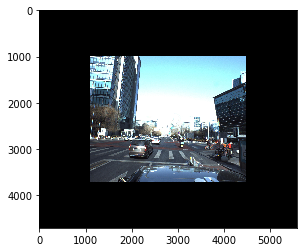

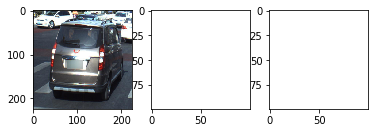

In [23]:
plt.imshow(img[0])
plt.figure()
idx = 0
(input_tensor, position_encode, target) = sample[idx]
plt.subplot(131)
plt.imshow(input_tensor[0].detach().numpy().transpose(1, 2, 0))
mesh = get_mesh(len(sample), 100, 100, encodings)
plt.subplot(132)
plt.imshow(mesh[idx, 0, :, :].detach().numpy(), 'gray', vmin = 0, vmax = 1)
plt.subplot(133)

plt.imshow(mesh[idx, 1, :, :].detach().numpy(), 'gray', vmin = 0, vmax = 1)
print('ymin', mesh[idx, 0, :, :].min(), 'ymax' , mesh[idx, 0, :, :].max(), 'xmin' , mesh[idx, 1, :, :].min(), 'xmax' ,  mesh[idx, 1, :, :].max())

(25, 2)


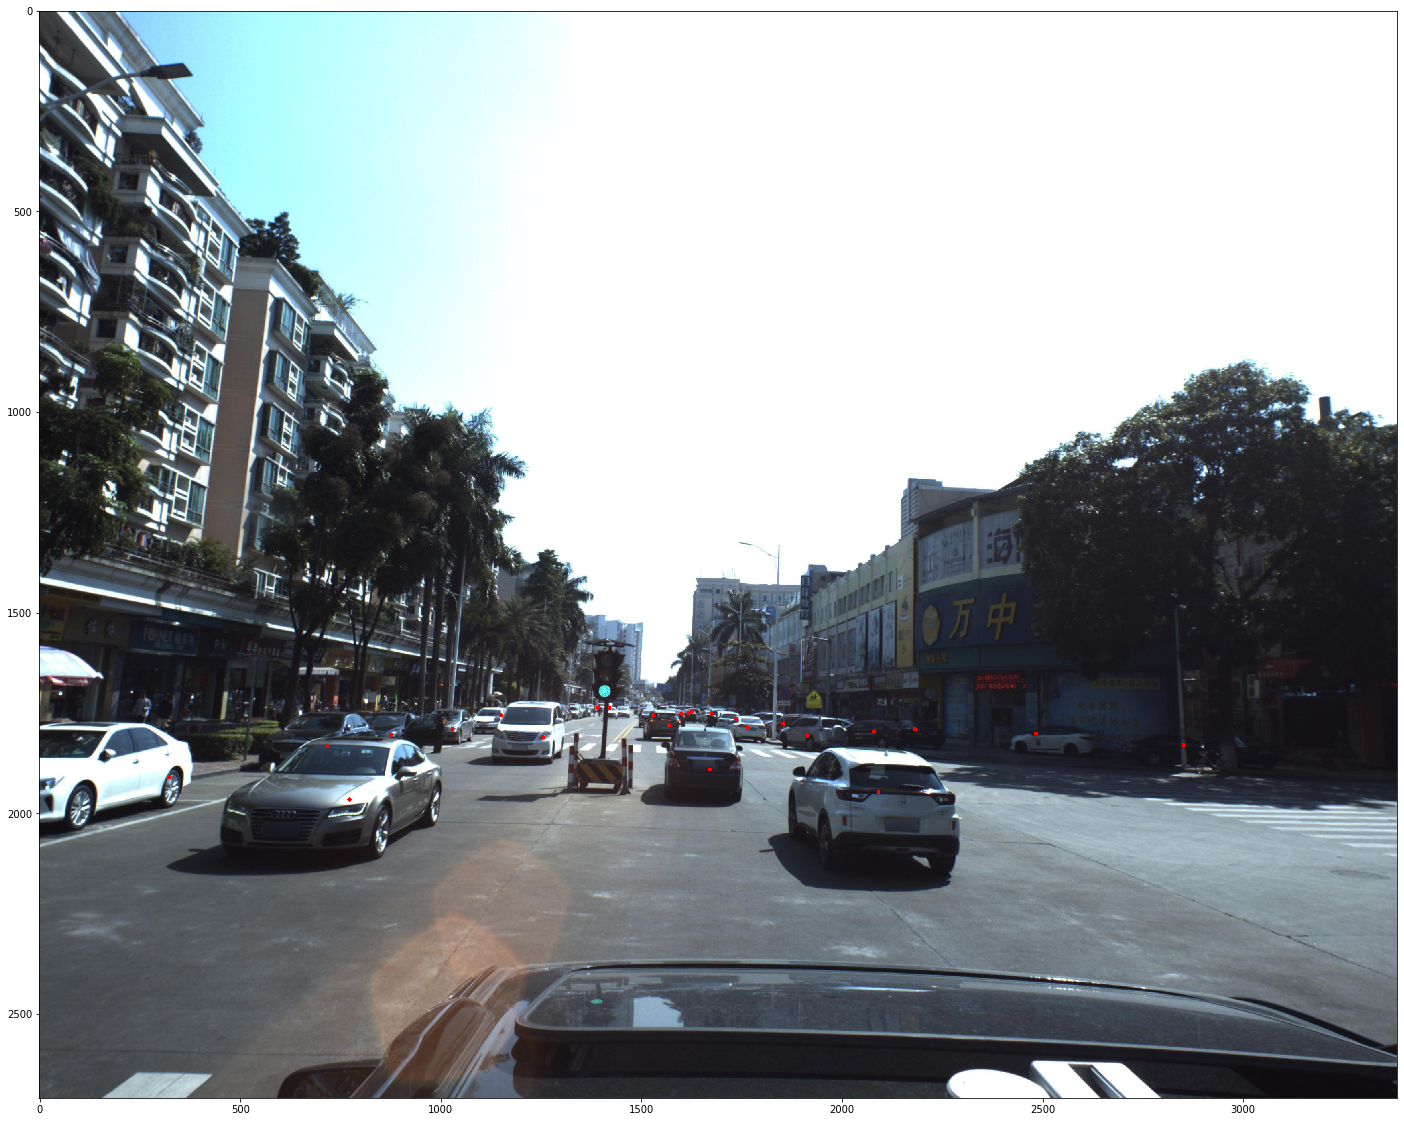

In [121]:
#visualize
k = np.array([[2304.5479, 0,  1686.2379],
           [0, 2305.8757, 1354.9849],
           [0, 0, 1]], dtype = np.float32)
testfile = './train_images/ID_a381bf4d0.jpg'
image = plt.imread(testfile)
xmin, xmax, ymin, ymax = df.loc[df['original_name']==testfile][['xmin','xmax','ymin','ymax']].values.T
predictors = np.zeros((len(xmin), 4))
predictors[:, 0] = (xmin+xmax)/2/3384
predictors[:, 1] = (ymin+ymax)/2/2710
predictors[:, 2] = (xmax-xmin)/3384
predictors[:, 3] = (ymax-ymin)/2710
preds = model.predict(predictors)
preds = preds*std+mean
camera_xyz = np.dot(k, preds.T).T
camera_xyz[:, 0]/=camera_xyz[:, 2]
camera_xyz[:, 1]/=camera_xyz[:, 2]
img_xyz = camera_xyz[:, :2]
print(img_xyz.shape)
for [p_x, p_y] in img_xyz:
    cv2.circle(image, (int(p_x), int(p_y)), 5, (255, 0, 0), -1)
plt.figure(figsize = (30, 20))
plt.imshow(image)